# Warning: If running this notebook remotely, to get the environment to render, you may have to run the notebook with: `xvfb-run -s "-screen 0 1400x900x24" jupyter notebook`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import imageio
from tqdm.auto import tqdm

import gym

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3 import A2C, DQN, PPO

from drlhp import HumanPreferencesEnvWrapper
from drlhp.reward_predictor_core_network import net_cnn

/home/eric/Code/miniconda3/envs/interp/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/eric/Code/miniconda3/envs/interp/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/eric/Code/miniconda3/envs/interp/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/eric/Co

In [13]:
cartpole = gym.make('CartPole-v0')

## Let's first train on the unwrapped CartPole environment

In [14]:
model = A2C('MlpPolicy', cartpole, verbose=0)

In [15]:
model.learn(total_timesteps=40000, eval_env=cartpole, eval_freq=5000)

Eval num_timesteps=5000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=10000, episode_reward=107.80 +/- 4.66
Episode length: 107.80 +/- 4.66
Eval num_timesteps=15000, episode_reward=144.60 +/- 11.06
Episode length: 144.60 +/- 11.06
Eval num_timesteps=20000, episode_reward=183.00 +/- 14.03
Episode length: 183.00 +/- 14.03
Eval num_timesteps=25000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
Eval num_timesteps=30000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
Eval num_timesteps=35000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
Eval num_timesteps=40000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00


In [16]:
images = []

obs = cartpole.reset()
for _ in tqdm(range(200)):
    action, _states = model.predict(obs, deterministic=False)
    obs, reward, done, info = cartpole.step(action)
    screenshot = model.env.render(mode='rgb_array')
#     screenshot = cartpole.render(mode='rgb_array')
    images.append(screenshot)
    
# images = [(img*255).astype(np.uint8) for img in images]

imageio.mimsave('tmp/cartpole-baseline.gif', images, fps=29)

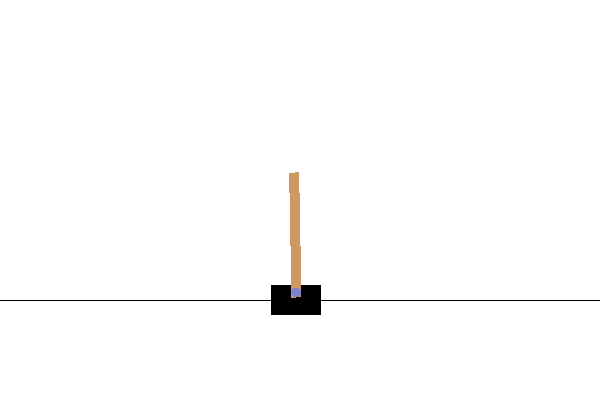

In [17]:
Image(filename="tmp/cartpole-baseline.gif")

## Okay! A good policy was learned on the unwrapped Cartpole. Let's wrap now with the `HumanPreferencesEnvWrapper`

In [18]:
preferences_env = HumanPreferencesEnvWrapper(env=cartpole,
                        reward_predictor_network=net_cnn,
                        synthetic_prefs=True)

In [19]:
pref_model = A2C('MlpPolicy', preferences_env, verbose=0)

In [20]:
pref_model.learn(total_timesteps=25000, eval_env=cartpole, eval_freq=5000)

Eval num_timesteps=5000, episode_reward=198.40 +/- 3.20
Episode length: 198.40 +/- 3.20
New best mean reward!
Eval num_timesteps=10000, episode_reward=120.20 +/- 12.83
Episode length: 120.20 +/- 12.83
Eval num_timesteps=15000, episode_reward=131.80 +/- 13.15
Episode length: 131.80 +/- 13.15
Eval num_timesteps=20000, episode_reward=200.00 +/- 0.00
Episode length: 200.00 +/- 0.00
New best mean reward!
Eval num_timesteps=25000, episode_reward=110.20 +/- 5.84
Episode length: 110.20 +/- 5.84


In [21]:
images = []

obs = preferences_env.reset()
for _ in tqdm(range(200)):
    action, _states = pref_model.predict(obs, deterministic=False)
    obs, reward, done, info = preferences_env.step(action)
    screenshot = pref_model.env.render(mode='rgb_array')
    images.append(screenshot)

imageio.mimsave('tmp/cartpole-preferences.gif', images, fps=29)

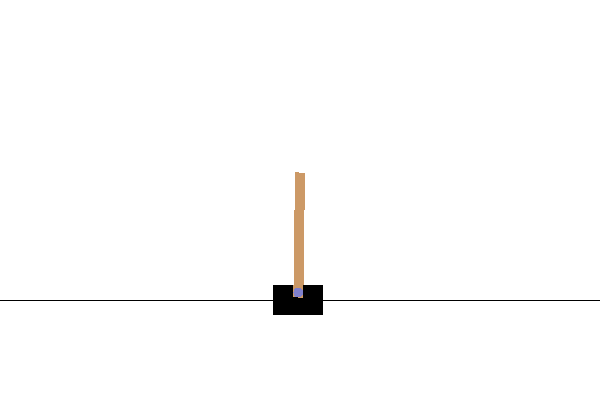

In [22]:
Image(filename="tmp/cartpole-preferences.gif")

In [32]:
obs = preferences_env.reset()
for _ in tqdm(range(200)):
    action, _states = pref_model.predict(obs, deterministic=False)
    obs, reward, done, info = preferences_env.step(action)
    print(reward)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0



In [35]:
preferences_env._start_reward_predictor_training()

In [37]:
preff_env = HumanPreferencesEnvWrapper(env=cartpole,
                        reward_predictor_network=net_cnn,
                        synthetic_prefs=True,
                        n_initial_training_steps=0)

In [39]:
pref_model = A2C('MlpPolicy', preff_env, verbose=0)

In [40]:
pref_model.learn(total_timesteps=25000, eval_env=cartpole, eval_freq=5000)

ValueError: not enough values to unpack (expected 3, got 1)